In [58]:
#import de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
#carga de datos
df = pd.read_csv('../datos_simulados/datos_final.csv')
df.head()

,Clase,Pieza,Superficie_1,Superficie_2,Tamaño_cavidad_mm,Estado_cavidad,Técnica,Tipo_resina,Índice_contracción_%,Peso_resina_inicial_mg,Peso_sobrante_mg,Margen_cavo_mm,Ajuste_margen
0,VI,6,Incisal,NaN,2.27,Limpia,Estratificación,Compuesta,1.79,68.41,7.88,1.74,Sobreobturado
1,I,31,Oclusal,NaN,4.68,Con tejido remanente,Bulk,Compuesta,3.24,84.91,15.84,1.37,Subobturado
2,I,16,Lingual,NaN,2.44,Limpia,Estratificación,Bulk,1.55,50.25,7.10,0.86,Sobreobturado
3,V,17,Lingual,NaN,1.19,Con tejido remanente,Bulk,Con fibra de vidrio,2.22,117.59,6.72,1.47,Subobturado
4,V,24,Lingual,NaN,3.12,Limpia,Bulk,Con fibra de vidrio,3.59,65.80,12.40,1.51,Sobreobturado


In [60]:
# Rellenar valores nulos en Superficie_2 con 'ninguna' (o cualquier valor neutral)
df.fillna({'Superficie_2': 'ninguna'}, inplace=True)
# Convertir variables categóricas a variables dummy
df = pd.get_dummies(df, drop_first=True)

In [61]:
# Variable objetivo: cuánta resina se debe utilizar
y = df['Peso_resina_inicial_mg']

# Variables de entrada: eliminamos columnas que no deben usarse para predecir
X = df.drop(columns=['Peso_resina_inicial_mg', 'Peso_sobrante_mg'])

In [62]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
# test_size=0.2 indica que el 20% de los datos será para prueba
# random_state=42 garantiza que la división siempre sea la misma (para reproducibilidad)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [63]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
# Realizar predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular el RMSE (raíz del error cuadrático medio)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calcular el R² (coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

#métricas de evaluación
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 20.16
R²: 0.29


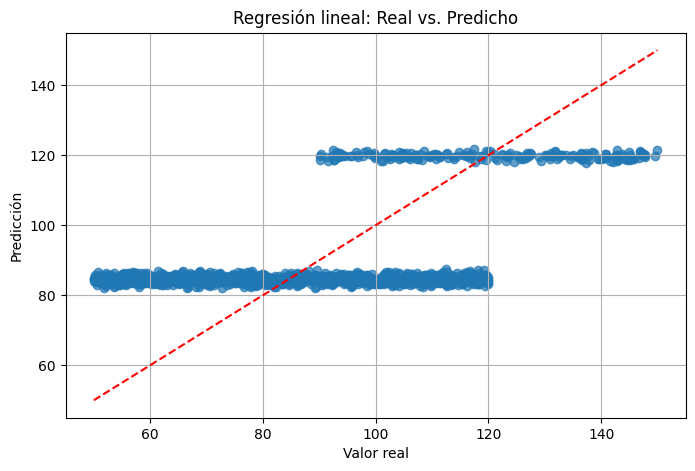

In [65]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Regresión lineal: Real vs. Predicho")
plt.grid(True)
plt.show()


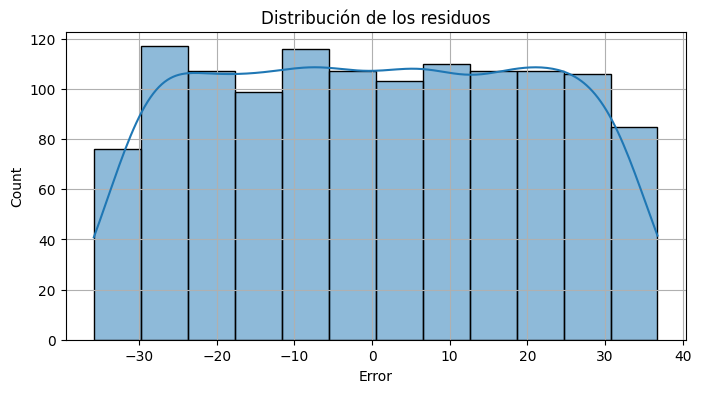

In [66]:
residuos = y_test - y_pred

plt.figure(figsize=(8,4))
sns.histplot(residuos, kde=True)
plt.title("Distribución de los residuos")
plt.xlabel("Error")
plt.grid(True)
plt.show()